In [1]:
from src.interactive_cx_list_optimizer import InteractiveCxListOptimizer
from src.cx_list_from_stabilizers_in_sequence import RotatedSurfaceCode
from src.circuit_from_cx_list import memory_experiment_circuit_from_cx_list


In [2]:
def get_distance(code):
    cx_list = code.generate_cx_list()
    ancilla_type, data_mapping, ancilla_mapping, flag_mapping= code.build_mappings()

    circ = memory_experiment_circuit_from_cx_list(
                    cx_list=cx_list,
                    ancilla_type=ancilla_type,
                    data_mapping=data_mapping,
                    ancilla_mapping=ancilla_mapping,
                    flag_mapping=dict(),  # No flag mapping used here
                    logicals=code.lz,
                    logical_type='Z',
                    p_cx=0.01,
                    p_idle=0,
                    number_of_cycles=5,
                    flag=False
                    
                )
    return(len(circ.shortest_graphlike_error()))


In [3]:
import numpy as np

np.random.seed(42)
code_distance = 5
random_ordered_code = RotatedSurfaceCode(L=code_distance, ordering="random")
print("Distance of the code is: ", get_distance(random_ordered_code))

optimal_ordered_code = RotatedSurfaceCode(L=code_distance, ordering='optimal')
print("Distance of the code is: ", get_distance(optimal_ordered_code))

optimizer_settings = {
    "code" : random_ordered_code,
    "cycles_with_noise": 5,
    "p_cx": 0.01,
    "p_idle": 0,
    "experiment_type": "both",
    "decoder": "pymatching",
}

run_optimazation_settings = {
    "max_bp_iterations": 10,
    "osd_order": 5,
    "iterations": 10,
    "max_num_shots": 10_000,
    "max_num_errors": 1000,

}

Distance of the code is:  3
Distance of the code is:  5


In [4]:
flag_optimizer = InteractiveCxListOptimizer(
    **optimizer_settings
)

In [5]:
flag_optimizer.run_optimization(**run_optimazation_settings,
                            flags=True,
                            step_type='single_stabilizer')

n_times_flagged: [34, 29, 0, 0, 38, 24, 28, 43, 35, 36, 0, 0, 108, 89, 0, 0, 24, 56, 90, 64, 47, 39, 0, 0]
n_times_flagged: [136, 72, 0, 0, 93, 103, 50, 50, 51, 117, 0, 0, 20, 38, 0, 0, 43, 36, 44, 25, 45, 27, 0, 0]
iteration 0
Changed: (0, 'X0') -> (1, 'X0')
Changed: (1, 'X0') -> (5, 'X0')
Changed: (5, 'X0') -> (6, 'X0')
Changed: (6, 'X0') -> (0, 'X0')
n_times_flagged: [28, 36, 0, 0, 41, 34, 36, 38, 43, 44, 0, 0, 121, 92, 0, 0, 26, 70, 84, 71, 32, 37, 0, 0]
n_times_flagged: [21, 47, 0, 0, 48, 57, 34, 24, 28, 62, 0, 0, 20, 23, 0, 0, 22, 20, 21, 11, 22, 22, 0, 0]
Iteration 0: improved objective to 0.08531115417743318
iteration 1
Changed: (19, 'X7') -> (24, 'X7')
Changed: (24, 'X7') -> (19, 'X7')
n_times_flagged: [22, 28, 0, 0, 30, 25, 21, 23, 28, 23, 0, 0, 75, 72, 0, 0, 18, 50, 71, 59, 25, 32, 0, 0]
n_times_flagged: [22, 57, 0, 0, 42, 56, 34, 21, 15, 14, 0, 0, 21, 23, 0, 0, 25, 17, 17, 19, 15, 13, 0, 0]
Iteration 1: improved objective to 0.08016294568956828
iteration 2
Changed: (8, 'X1'

In [6]:
def run_random_optimizer(n_optimizers=3):
    random_optimizers = []
    for _ in range(n_optimizers):

        random_optimizer = InteractiveCxListOptimizer(
            **optimizer_settings,
        )
        random_optimizer.run_optimization(**run_optimazation_settings,
                                    flags=False,
                                    step_type='single_stabilizer')
        random_optimizers.append(random_optimizer)        
    return(random_optimizers)


In [7]:
random_optimizers = run_random_optimizer(n_optimizers=3)

iteration 0
Changed: (14, 'X11') -> (19, 'X11')
Changed: (19, 'X11') -> (14, 'X11')
Iteration 0: improved objective to 0.08845796000000006
iteration 1
Changed: (6, 'Z0') -> (2, 'Z0')
Changed: (1, 'Z0') -> (7, 'Z0')
Changed: (2, 'Z0') -> (1, 'Z0')
Changed: (7, 'Z0') -> (6, 'Z0')
iteration 2
Changed: (6, 'Z2') -> (5, 'Z2')
Changed: (5, 'Z2') -> (10, 'Z2')
Changed: (10, 'Z2') -> (6, 'Z2')
iteration 3
Changed: (21, 'Z6') -> (15, 'Z6')
Changed: (15, 'Z6') -> (21, 'Z6')
Changed: (20, 'Z6') -> (16, 'Z6')
Changed: (16, 'Z6') -> (20, 'Z6')
iteration 4
Changed: (23, 'Z10') -> (24, 'Z10')
Changed: (24, 'Z10') -> (23, 'Z10')
iteration 5
Changed: (13, 'Z5') -> (18, 'Z5')
Changed: (18, 'Z5') -> (14, 'Z5')
Changed: (14, 'Z5') -> (19, 'Z5')
Changed: (19, 'Z5') -> (13, 'Z5')
iteration 6
Changed: (7, 'X2') -> (6, 'X2')
Changed: (11, 'X2') -> (7, 'X2')
Changed: (6, 'X2') -> (12, 'X2')
Changed: (12, 'X2') -> (11, 'X2')
iteration 7
Changed: (14, 'X3') -> (9, 'X3')
Changed: (9, 'X3') -> (14, 'X3')
iteration

In [8]:
code = RotatedSurfaceCode(L=code_distance, ordering='optimal')

optimizer_settings['code'] = code
optimizer_starting_at_optimal = InteractiveCxListOptimizer(
    **optimizer_settings
)


optimization_settings_zero_iterations = run_optimazation_settings.copy()
optimization_settings_zero_iterations['iterations'] = 0
optimizer_starting_at_optimal.run_optimization(**optimization_settings_zero_iterations,
                                                flags=False,
                                                draw=False,
                                                step_type='single_stabilizer',
                                                )
optimal_logical_error_rate = optimizer_starting_at_optimal.optimizer_history[-1]

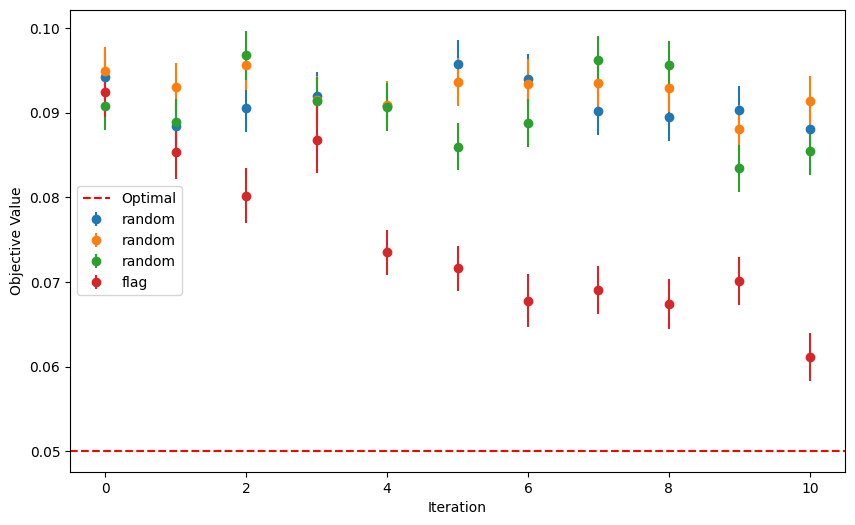

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
for random_optimizer in random_optimizers:
    random_optimizer.plot_history(ax, label='random')
flag_optimizer.plot_history(ax, label='flag')
ax.axhline(y=optimizer_starting_at_optimal.optimizer_history[-1].objective_value, color='r', linestyle='--', label='Optimal')
ax.legend()#['optimal', 'random', 'flag'])

In [10]:
print(flag_optimizer.optimizer_history[-1].cx_list)
print(flag_optimizer.optimizer_history[0].cx_list)

[(1, 'X0'), (5, 'X0'), (6, 'X0'), (0, 'X0'), (8, 'X1'), (7, 'X1'), (2, 'X1'), (3, 'X1'), (12, 'X2'), (6, 'X2'), (7, 'X2'), (11, 'X2'), (13, 'X3'), (8, 'X3'), (9, 'X3'), (14, 'X3'), (11, 'X4'), (15, 'X4'), (16, 'X4'), (10, 'X4'), (13, 'X5'), (18, 'X5'), (12, 'X5'), (17, 'X5'), (21, 'X6'), (16, 'X6'), (22, 'X6'), (17, 'X6'), (24, 'X7'), (18, 'X7'), (23, 'X7'), (19, 'X7'), (5, 'X8'), (10, 'X8'), (20, 'X9'), (15, 'X9'), (4, 'X10'), (9, 'X10'), (14, 'X11'), (19, 'X11'), (6, 'Z0'), (2, 'Z0'), (7, 'Z0'), (1, 'Z0'), (4, 'Z1'), (3, 'Z1'), (8, 'Z1'), (9, 'Z1'), (6, 'Z2'), (5, 'Z2'), (11, 'Z2'), (10, 'Z2'), (7, 'Z3'), (12, 'Z3'), (13, 'Z3'), (8, 'Z3'), (17, 'Z4'), (11, 'Z4'), (12, 'Z4'), (16, 'Z4'), (13, 'Z5'), (18, 'Z5'), (14, 'Z5'), (19, 'Z5'), (21, 'Z6'), (15, 'Z6'), (20, 'Z6'), (16, 'Z6'), (22, 'Z7'), (23, 'Z7'), (18, 'Z7'), (17, 'Z7'), (0, 'Z8'), (1, 'Z8'), (2, 'Z9'), (3, 'Z9'), (23, 'Z10'), (24, 'Z10'), (21, 'Z11'), (22, 'Z11')]
[(0, 'X0'), (1, 'X0'), (5, 'X0'), (6, 'X0'), (8, 'X1'), (7, 'X

In [11]:
#draw_ordered_tanner_graph.draw_cx_list(flag_optimizer.optimizer_history[0].cx_list, flag_optimizer.ancilla_type, data_coords=code.data_coords, ancilla_coords=code.ancilla_coords)
cx_list1 = random_ordered_code.generate_cx_list()
cx_list2 = random_optimizer.optimizer_history[0].cx_list

for i, (a, b) in enumerate(zip(cx_list1, cx_list2)):
    if a != b:
        print(f"Difference at index {i}: {a} != {b}")

assert cx_list1 == cx_list2

In [12]:
print(random_ordered_code.generate_cx_list())
print(random_optimizer.optimizer_history[0].cx_list)

[(0, 'X0'), (1, 'X0'), (5, 'X0'), (6, 'X0'), (8, 'X1'), (7, 'X1'), (2, 'X1'), (3, 'X1'), (7, 'X2'), (11, 'X2'), (6, 'X2'), (12, 'X2'), (13, 'X3'), (14, 'X3'), (9, 'X3'), (8, 'X3'), (11, 'X4'), (15, 'X4'), (16, 'X4'), (10, 'X4'), (13, 'X5'), (18, 'X5'), (12, 'X5'), (17, 'X5'), (21, 'X6'), (16, 'X6'), (22, 'X6'), (17, 'X6'), (19, 'X7'), (18, 'X7'), (23, 'X7'), (24, 'X7'), (5, 'X8'), (10, 'X8'), (20, 'X9'), (15, 'X9'), (4, 'X10'), (9, 'X10'), (14, 'X11'), (19, 'X11'), (6, 'Z0'), (1, 'Z0'), (2, 'Z0'), (7, 'Z0'), (8, 'Z1'), (3, 'Z1'), (9, 'Z1'), (4, 'Z1'), (6, 'Z2'), (5, 'Z2'), (11, 'Z2'), (10, 'Z2'), (7, 'Z3'), (12, 'Z3'), (13, 'Z3'), (8, 'Z3'), (16, 'Z4'), (12, 'Z4'), (17, 'Z4'), (11, 'Z4'), (13, 'Z5'), (18, 'Z5'), (14, 'Z5'), (19, 'Z5'), (21, 'Z6'), (15, 'Z6'), (20, 'Z6'), (16, 'Z6'), (22, 'Z7'), (23, 'Z7'), (18, 'Z7'), (17, 'Z7'), (0, 'Z8'), (1, 'Z8'), (2, 'Z9'), (3, 'Z9'), (23, 'Z10'), (24, 'Z10'), (21, 'Z11'), (22, 'Z11')]
[(0, 'X0'), (1, 'X0'), (5, 'X0'), (6, 'X0'), (8, 'X1'), (7, 'X